# <span style="color:red"> Laboratorio di Simulazione Numerica (LSN) </span>
## <span style="color:green"> Esercitazione Numerica #06</span>

Durante la sesta esercitazione del corso abbiamo introdotto il **Campionamento alla Gibbs**, conosciuto anche come algoritmo del bagno termico. Trattasi di un metodo di campionamento Monte Carlo tramite catena di Markov che può essere interpretato come un algoritmo di Metropolis, in cui ogni mossa è caratterizzata da un'accettazione fissa del 100%. In particolare, all'interno della lezione teorica, abbiamo visto come, applicando l'algoritmo di Metropolis o il campionamento alla Gibbs, diventi possibile simulare l'insieme canonico della Meccanica Statistica (numero di particelle, volume ed temperatura fissati) attraverso il campionamento dei pesi di Boltzmann  $p(\hat{H}) = \frac{1}{Z} \exp(-\beta \hat{H})$. Questo approccio ci permetterà di discutere le principali proprietà fisiche di un sistema complesso costituito da spin interagenti con un campo magnetico esterno. In particolare, nel nostro caso, ci siamo riferiti al noto **Modello di Ising 1D**, per il quale abbiamo visto esistere una soluzione esatta proprio in Meccanica Statistica. La matrice Hamiltoniana associata ad un sistema di questo tipo, con $N$ particelle interagenti, è riportata di seguito.

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

dove le $\{ s_i \}_{i=1,N}$ rappresentano le proiezioni di spin delle singole paricelle, soddisfacenti la condizione di periodicità al contorno $s_{N+1} = s_{1}$, mentre $h$ e $J$ sono costanti che descrivono rispettivamente l'interazione spin-campo magnetico e l'accoppiamento spin-spin ($J>0$ modello ferromagnetico).

### <span style="color:darkorange"> Esercizio 06.1</span>

Per svolgere l'esercizio ci è stato fornito un codice di base in grado di simulare il modello di Ising 1D. Per iniziare, quindi, ci è bastato implementare sia il campionamento tramite algoritmo di Metropolis e Gibbs, sia il calcolo di alcune grandezze fisiche, quali:

1. Energia Interna: $U(N,T) = \langle H \rangle_{h=0}$
2. Coefficiente di Capacità Termica: $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. Magnetizzazione: $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$
4. Suscettività Magnetica: $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$

In particolare, abbiamo dovuto studiare il loro andamento in funzione della temperatura $T$, discretizzando il range $\left[0.5;2.0\right]$ e fissando un coefficiente d'interazione spin-spin $J=1$.

Una volta fissata la temperatura $T$ e raggiunta la condizione d'equilibrio del sistema, quest'ultima ottenuta monitorando l'andamento della magnetizzazione $M$ in funzione degli step di simulazione, ho potuto misurare le varie grandezze enunciate sopra sia per mezzo dell'algoritmo di Metropolis, sia attraverso il campionamento alla Gibbs, e ho potuto confrontare i risultati della simulazione con i valori teorici attesi, ricavati per via analitica. Anche in questo caso, valori medi ed incertezze sono stati calcolati "on the fly" applicando il metodo a blocchi. In particolare, per ognuna delle grandezze sopra enunciate, ho estrapolato un campione di $M=10^6$ misure e ho fissato un numero di blocchi $N_{blk} = 20$. Ripetendo questa procedura per $21$ temperature differenti, estrapolate dall'intervallo $\left[0.5;2.0\right]$, ho potuto ricavare l'andamento di queste grandezze fisiche al variare di $T$.

Come scritto sopra, per ottenere una stima dell'energia interna per unità di particella $U/N$ (per $h=0$) abbiamo dovuto calcolare il valor medio della funzione Hamiltoniana, valutata per un numero sufficiente di configurazioni all'equilibrio. I risultati delle due simulazioni sono stati quindi confrontati con l'espressione analitica esatta riportata di seguito.

$$
\frac{U(N,T)}{N} \underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

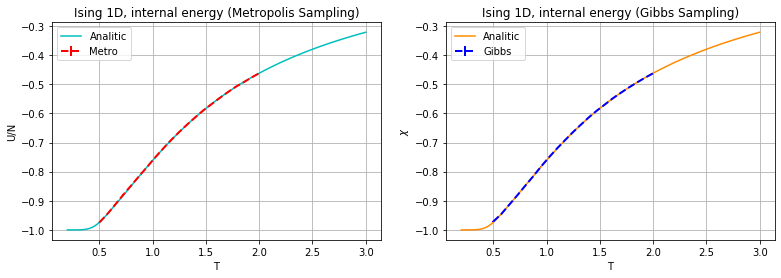

In [2]:
import numpy as np
import matplotlib.pyplot as plt

points=100
T = np.linspace(0.2,3.0,num=points)
b = 1/T
J = 1.0
Ns = 50
th = np.tanh(J*b)
thN= th**Ns
ch = 1/th

e = -J*( th + ch*thN )/( 1 + thN )

temp,Umetro,err_Umetro = np.loadtxt("Metro/ave_ene.final", usecols=(0,1,2), delimiter=' ', unpack='true')
temp,Ugibbs,err_Ugibbs = np.loadtxt("Gibbs/ave_ene.final", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(T, e,color='c',label='Analitic')
plt.title('Ising 1D, internal energy (Metropolis Sampling)')
plt.xlabel('T')
plt.ylabel('U/N')

plt.errorbar(temp,Umetro,err_Umetro,color='r',linestyle='dashed',label='Metro', linewidth=2.0)
plt.grid(True)
plt.legend()

plt.subplot(132)
plt.plot(T, e,color='darkorange',label='Analitic')
plt.title('Ising 1D, internal energy (Gibbs Sampling)')
plt.xlabel('T')
plt.ylabel('$\chi$')

plt.errorbar(temp,Ugibbs,err_Ugibbs,color='b',linestyle='dashed',label='Gibbs', linewidth=2.0)
plt.grid(True)
plt.legend()

plt.show()

Il trend dei risultati emersi dalle simulazioni appare in perfetto accordo con l'andamento predetto teoricamente. Osserviamo in particolare come, all'aumentare della temperatura, l'energia interna si avvicini sempre più a zero (partendo da valori negativi). Questo comportamento si può giustificare ricordando che, in Meccanica Statistica, un aumento della temperatura, ci porta verso una configurazione in cui gli spin sono sempre più scorrelati tra loro e le probabilità di occupazione dei due stati popssibili (spin up/spin down) tendono a coincidere (per $T\to\infty$ i pesi di Blotzmann diventano quantità costanti). Ciò comporta ovviamente una diminuzione, in modulo, del valore della prima sommatoria che compare all'interno dell'Hamiltoniana.

La seconda grandezza fisica presa in considerazione, è stato il coefficiente di capacità termica $C/N$ in assenza di campo magnetico ($h=0$), calcolato, a meno di un fattore moltiplicativo pari a $\beta ^2$ (in unità di costante di Boltzmann $k_B = 1$), come lo scarto quadratico medio della funzione Hamiltoniana. Anche in questo caso si sono confrontati i risultati con i valori teorici attesi.

$$
\frac{C(N,T)}{N} = \underset{h=0}= k_B (\beta J)^2 \left\{ \frac{1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

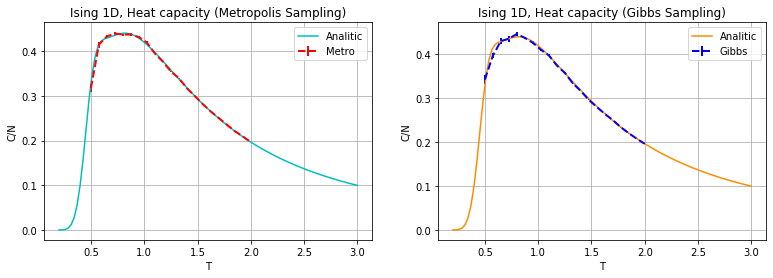

In [3]:
heat=((b*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

temp,Cmetro,err_Cmetro = np.loadtxt("Metro/ave_heat.final", usecols=(0,1,2), delimiter=' ', unpack='true')
temp,Cgibbs,err_Cgibbs = np.loadtxt("Gibbs/ave_heat.final", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(T, heat,color='c',label='Analitic')
plt.title('Ising 1D, Heat capacity (Metropolis Sampling)')
plt.xlabel('T')
plt.ylabel('C/N')

plt.errorbar(temp,Cmetro,err_Cmetro,color='r',linestyle='dashed',label='Metro', linewidth=2.0)
plt.grid(True)
plt.legend()

plt.subplot(132)
plt.plot(T, heat,color='darkorange',label='Analitic')
plt.title('Ising 1D, Heat capacity (Gibbs Sampling)')
plt.xlabel('T')
plt.ylabel('C/N')

plt.errorbar(temp,Cgibbs,err_Cgibbs,color='b',linestyle='dashed',label='Gibbs', linewidth=2.0)
plt.grid(True)
plt.legend()

plt.show()

I plot sopra riportati mostrano come i risultati della simulazione approssimino in modo molto preciso le curve analitiche. 

Per quanto riguarda la magnetizzazione $M/N$, essa è stata calcolata immergendo il campione all'interno di un campo magnetico caratterizzato da $h=0.2$, e valutando il valor medio dello spin totale del sistema in corrispondenza di un numero sufficiente di configurazioni. Risolvendo per via analitica il modello di Ising, si ottiene che, per $h \neq 0$, vale la seguente espressione.

$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \left[\lambda_1^{N-1}\cdot \left(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\right) + \lambda_2^{N-1}\cdot \left(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\right)\right]
$$

<font color="blue">**N.B.**</font> Alla luce di quanto visto a lezione, è facile rendersi conto che per $h=0$ la magnetizzazione sarebbe stata constantemente uguale a $0$ per ogni valore di $T$ in quanto, in assenza di campo magnetico esterno, non sarebbe stato possibile osservare alcuna transizione di fase verso lo stato ferromagnetico.

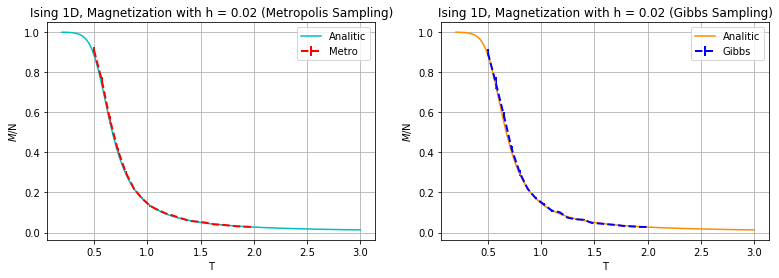

In [4]:
h=0.02 #external field

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

temp,Mmetro,err_Mmetro = np.loadtxt("Metro/ave_mag.final", usecols=(0,1,2), delimiter=' ', unpack='true')
temp,Mgibbs,err_Mgibbs = np.loadtxt("Gibbs/ave_mag.final", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(T, M,color='c',label='Analitic')
plt.title('Ising 1D, Magnetization with h = 0.02 (Metropolis Sampling)')
plt.xlabel('T')
plt.ylabel('$M$/N')

plt.errorbar(temp,Mmetro,err_Mmetro,color='r',linestyle='dashed',label='Metro', linewidth=2.0)
plt.grid(True)
plt.legend()

plt.subplot(132)
plt.plot(T, M,color='darkorange',label='Analitic')
plt.title('Ising 1D, Magnetization with h = 0.02 (Gibbs Sampling)')
plt.xlabel('T')
plt.ylabel('$M$/N')

plt.errorbar(temp,Mgibbs,err_Mgibbs,color='b',linestyle='dashed',label='Gibbs', linewidth=2.0)
plt.grid(True)
plt.legend()

plt.show()

Gli andamenti delle grandezze ricavati dalla simulazione appaiono in ottimo accordo con i risultati analitici predetti dal modello teorico. Nello specifico, è interessante fare qualche osservazione relativa alle curve ottenute per $M$. Vediamo prima di tutto come, aumentando la temperatura, la magnetizzazione tendea a crollare verso valori prossimi a zero. Tuttavia, in virtù delle propretà ferromagnetiche del sistema, anche in corrispondenza di temperature elevate, la magnetizzazione non è mai identicamente uguale a zero. Questa proprietà è dovuta, fondamentalmente, alla tendenza dell’energia d'interazione con il campo esterno ad opporsi al disordine termico causato dall’aumento di temperatura.

L'ultima grandezza calcolata è stata la suscettività magnetica $\chi$ (per $h=0$), ottenuta, a meno di un fattore $\beta$, come scarto quadratico medio dello spin totale del sistema. Di seguito è riportata l'espressione analitica di tale quantità.

$$
\chi(N,T) \underset{h=0}= \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

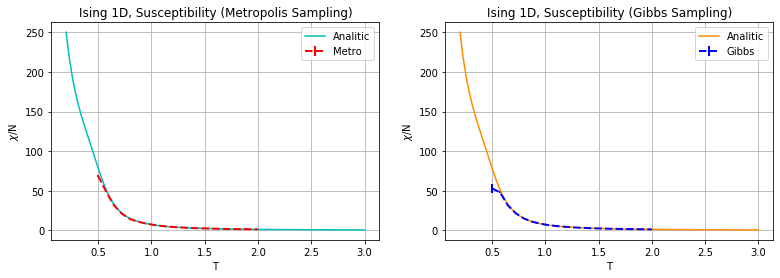

In [5]:
X = b*np.exp(2*b*J)*(1-thN)/(1+thN)

temp,Xmetro,err_Xmetro = np.loadtxt("Metro/ave_chi.final", usecols=(0,1,2), delimiter=' ', unpack='true')
temp,Xgibbs,err_Xgibbs = np.loadtxt("Gibbs/ave_chi.final", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(T, X,color='c',label='Analitic')
plt.title('Ising 1D, Susceptibility (Metropolis Sampling)')
plt.xlabel('T')
plt.ylabel('$\chi$/N')

plt.errorbar(temp,Xmetro,err_Xmetro,color='r',linestyle='dashed',label='Metro', linewidth=2.0)
plt.grid(True)
plt.legend()

plt.subplot(132)
plt.plot(T, X,color='darkorange',label='Analitic')
plt.title('Ising 1D, Susceptibility (Gibbs Sampling)')
plt.xlabel('T')
plt.ylabel('$\chi$/N')

plt.errorbar(temp,Xgibbs,err_Xgibbs,color='b',linestyle='dashed',label='Gibbs', linewidth=2.0)
plt.grid(True)
plt.legend()

plt.show()

Anche in questo caso possiamo osservare come le curve ottenute dalla simulazione appossimino in modo molto preciso l'andamento teorico della suscettività predetto dal modello di Ising 1D. 

Per concludere, ho voluto studiare anche l'andamento del rate di accettazione dell'algoritmo di Metropolis in funzione della temperatura.

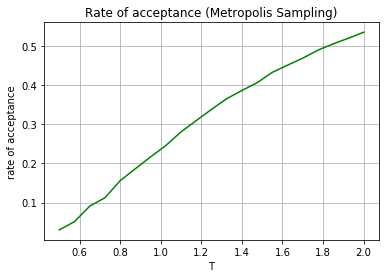

In [6]:
temp,rate_of_acceptance = np.loadtxt("Metro/acc.final", usecols=(0,1), delimiter=' ', unpack='true')

plt.figure()
plt.plot(temp, rate_of_acceptance,color='g')
plt.title('Rate of acceptance (Metropolis Sampling)')
plt.xlabel('T')
plt.ylabel('rate of acceptance')
plt.grid(True)

plt.show()

Come ci si poteva aspettare già a livello intuitivo, la curva ottenuta risulta monotona crescente, in accordo col fatto che, a basse temperature, diventa sempre più difficile transire verso configurazioni ad energia superiore. Infatti per $T\to0$ si ha $\exp(-\beta \Delta E) \to 0$ e quindi anche l'accettazione della mossa tende a zero.